In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from census import Census

# Import census key and set to year 2016
c = Census("8d266861f3d4e6a17282942ceee2203290990edd", year=2016)

In [3]:
# Run Census Search to retrieve data on by states
census_data = c.acs5.get(("NAME", "B01003_001E", "B19013_001E", "B15003_002E","B15003_002E", 
                          "B15003_017E", "B15003_018E", "B15003_021E", "B15003_022E", "B15003_023E", 
                          "B15003_024E", "B15003_025E"), {'for': 'state:*'})

# Create datafram
census_df = pd.DataFrame(census_data)

# Relabel and Reorder Columns
census_df = census_df.rename(columns={"state": "State",
                                      "NAME": "Name",
                                      "B01003_001E": "Population",
                                      "B19013_001E": "Income",
                                      "B15003_002E": "No Education", 
                                      "B15003_017E": "High School Education", 
                                      "B15003_018E": "GED Education",
                                      "B15003_021E": "Associates Degree",
                                      "B15003_022E": "Bachelors Degree", 
                                      "B15003_023E": "Masters Degree",
                                      "B15003_024E": "Professional Degree",
                                      "B15003_025E": "Doctoral Degree"
                                      })

census_df = census_df.reindex(columns=["Name", "Population", "Income",  "No Education", "High School Education", 
                                       "GED Education", "Associates Degree", "Bachelors Degree" , "Masters Degree", 
                                       "Professional Degree", "Doctoral Degree"])

# Print
census_df.head()

,Name,Population,Income,No Education,High School Education,GED Education,Associates Degree,Bachelors Degree,Masters Degree,Professional Degree,Doctoral Degree
0,Alabama,4841164.0,44758.0,42577.0,828205.0,181388.0,258502.0,492382.0,208839.0,49283.0,32572.0
1,Alaska,736855.0,74444.0,3020.0,106169.0,24342.0,39133.0,86551.0,35423.0,8522.0,5029.0
2,Arizona,6728577.0,51340.0,62538.0,898657.0,179701.0,379207.0,777681.0,333226.0,76987.0,53531.0
3,Arkansas,2968472.0,42336.0,23010.0,561132.0,122754.0,127004.0,273557.0,108055.0,24517.0,18317.0
4,California,38654206.0,63783.0,673089.0,4678279.0,582625.0,1995579.0,5136043.0,2045487.0,597874.0,397083.0


In [7]:
# Create No Degree column
census_df["No Degree"] = census_df["No Education"] + census_df["High School Education"] + census_df["GED Education"]

# Create Degree column
census_df["Degree"] = census_df["Associates Degree"] + census_df["Bachelors Degree"] + census_df["Masters Degree"] \
                    + census_df["Professional Degree"] + census_df["Doctoral Degree"]

# All columns needed for data by state saved to .csv in case needed
census_df.to_csv("Census_by_state_all.csv", index=False)

# Print
census_df.head()

,Name,Population,Income,No Education,High School Education,GED Education,Associates Degree,Bachelors Degree,Masters Degree,Professional Degree,Doctoral Degree,No Degree,Degree
0,Alabama,4841164.0,44758.0,42577.0,828205.0,181388.0,258502.0,492382.0,208839.0,49283.0,32572.0,1052170.0,1041578.0
1,Alaska,736855.0,74444.0,3020.0,106169.0,24342.0,39133.0,86551.0,35423.0,8522.0,5029.0,133531.0,174658.0
2,Arizona,6728577.0,51340.0,62538.0,898657.0,179701.0,379207.0,777681.0,333226.0,76987.0,53531.0,1140896.0,1620632.0
3,Arkansas,2968472.0,42336.0,23010.0,561132.0,122754.0,127004.0,273557.0,108055.0,24517.0,18317.0,706896.0,551450.0
4,California,38654206.0,63783.0,673089.0,4678279.0,582625.0,1995579.0,5136043.0,2045487.0,597874.0,397083.0,5933993.0,10172066.0


In [8]:
# Only use necessary columns
census_df = census_df.reindex(columns=["Name", "Population", "Income", "No Degree", "Degree"])

# Add No Degree %
census_df["No Degree %"] = census_df["No Degree"] / (census_df["No Degree"] + census_df["Degree"])
census_df["No Degree %"] = round(census_df["No Degree %"]*100,2)

# Add Degree %
census_df["Degree %"] = census_df["Degree"] / (census_df["No Degree"] + census_df["Degree"])
census_df["Degree %"] = round(census_df["Degree %"]*100,2)
census_df.head()

,Name,Population,Income,No Degree,Degree,No Degree %,Degree %
0,Alabama,4841164.0,44758.0,1052170.0,1041578.0,50.25,49.75
1,Alaska,736855.0,74444.0,133531.0,174658.0,43.33,56.67
2,Arizona,6728577.0,51340.0,1140896.0,1620632.0,41.31,58.69
3,Arkansas,2968472.0,42336.0,706896.0,551450.0,56.18,43.82
4,California,38654206.0,63783.0,5933993.0,10172066.0,36.84,63.16


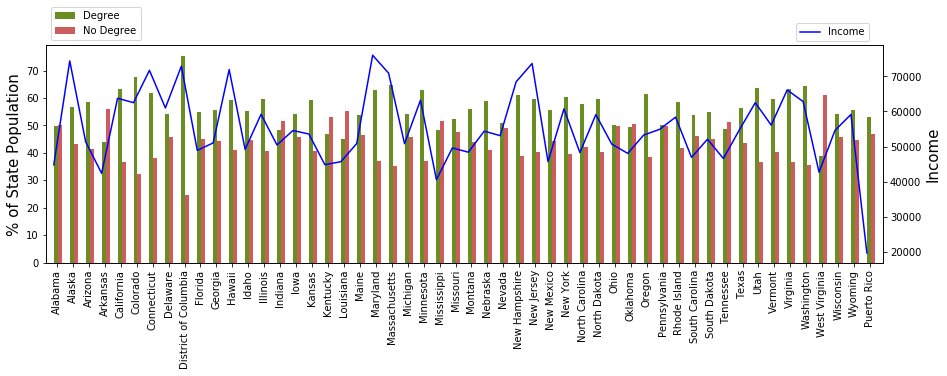

In [9]:
# Create bar charts of degree and no degree per state of % of population 
colors = ['olivedrab', 'indianred']
labels = ["Degree" , "No Degree"]
ax1 = census_df.plot.bar(x="Name", y=["Degree %", "No Degree %"], figsize=(15,4), color=colors, align='edge', label=labels)

# Add secondary y axis line chart for income
ax2 = census_df.plot.line(x="Name", y="Income", color='b', rot=90, ax=ax1, secondary_y=True)

# Clean up and label chart
plt.xticks(np.arange(len(census_df["Name"]))+0.2, census_df["Name"])
plt.xlim(-.5, len(census_df["Name"]))
ax1.legend(loc='center', bbox_to_anchor=(.06, 1.1), ncol=1)
ax2.legend(loc='center', bbox_to_anchor=(.94, 1.06), ncol=1)
ax1.set_xlabel("")
ax1.set_ylabel('% of State Population', fontsize=15)
ax2.set_ylabel('Income', fontsize=15)

# Show plot
plt.show()